# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 0. Import Libraries </div>

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data to a data frame
df=pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
#displaying the first 5 rows of the data set
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#displaying last 5 rows of the data set
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
#shape of the data set
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.describe(include='object') #checking only for categorical features

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 1. EDA on the data </div>

In [9]:
#finding missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* *From the above output it is noted that there are no null values in the data set*

Text(0.5, 1.0, 'Missing values')

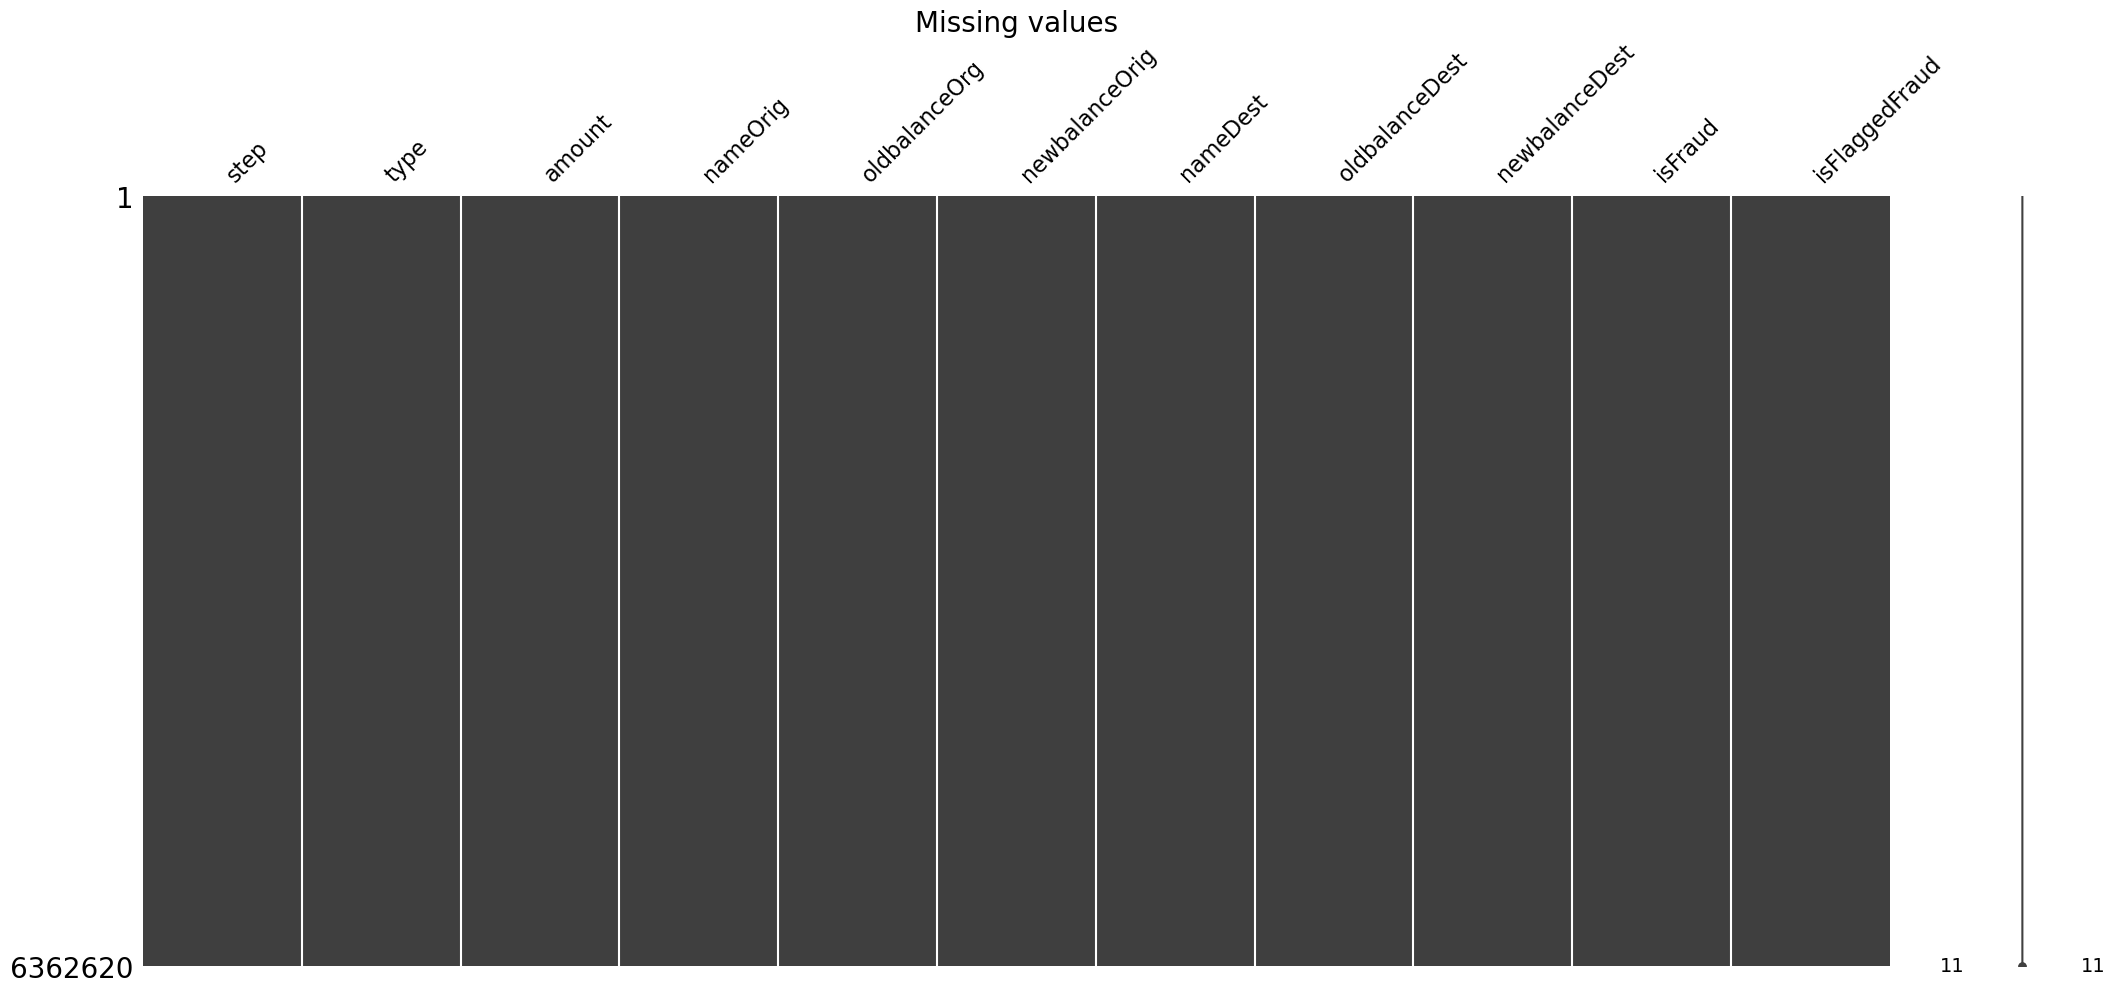

In [10]:
#graphical representation of the missing values
import missingno as msno
df.isnull().sum()
msno.matrix(df).set_title("Missing values",fontsize=20)

In [11]:
#finding duplicate values
df.duplicated().sum()

0

* *From the above output it is noted that there are no duplicate values in the data set*

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


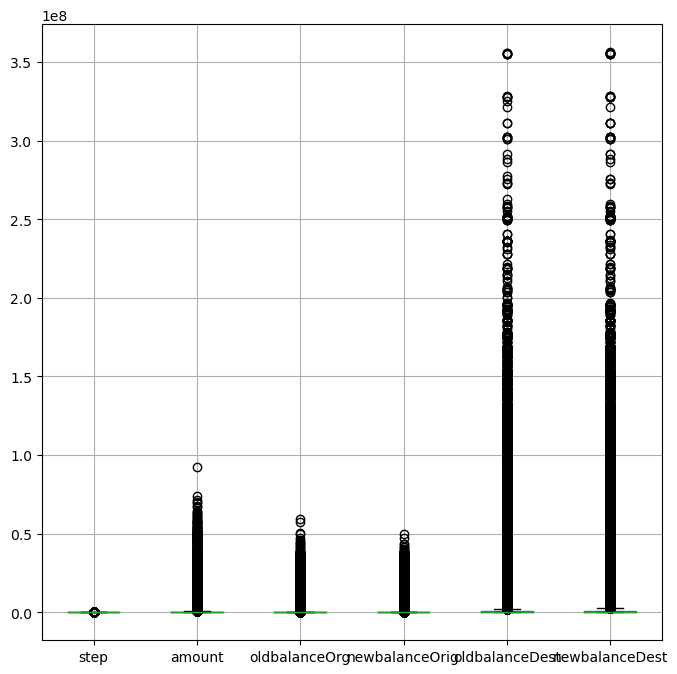

In [13]:
#Plotting box plot for all the numerical coumns to check whether outlier is present or not
plt.figure(figsize=(8,8))
boxplot=df.boxplot(column=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])

* *From the box plot it is observed that there are mmany outliers present in the data set. Now we know even though outliers are present, some columns contribute or effect the desired output in a good way. To determine the influence of the variables to the ouput we can  **VARIANCE INFLATION FACTOR** , **CORRELATION MAP**.*

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 2. Visualizations </div>

<AxesSubplot:xlabel='type', ylabel='count'>

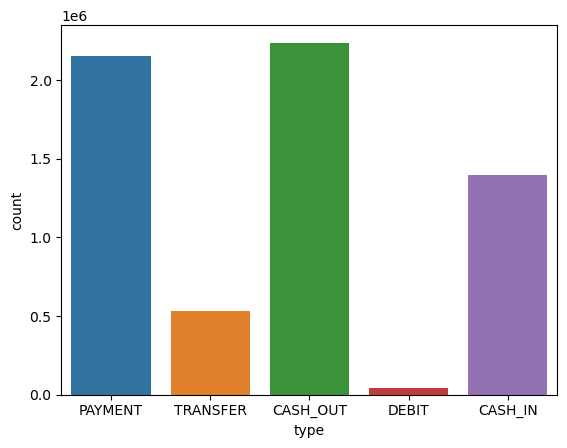

In [14]:
sns.countplot(df['type'])

<AxesSubplot:ylabel='isFraud'>

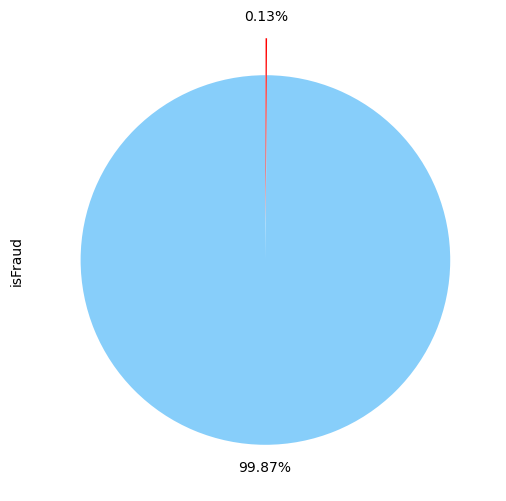

In [15]:
colors_list = ['lightskyblue','red']
explode_list = [0,0.2]
theme = plt.get_cmap('copper')
y=df['isFraud'].value_counts()
y.plot(kind='pie',
        figsize=(15, 6),
        autopct='%.2f%%',
        startangle=90,
        shadow=False,
        labels=None,
        pctdistance=1.12,
        colors=colors_list,
        explode=explode_list
       )

* *From the pie chart it is observed that only **0.13%** of the transactions are fraud*

<AxesSubplot:>

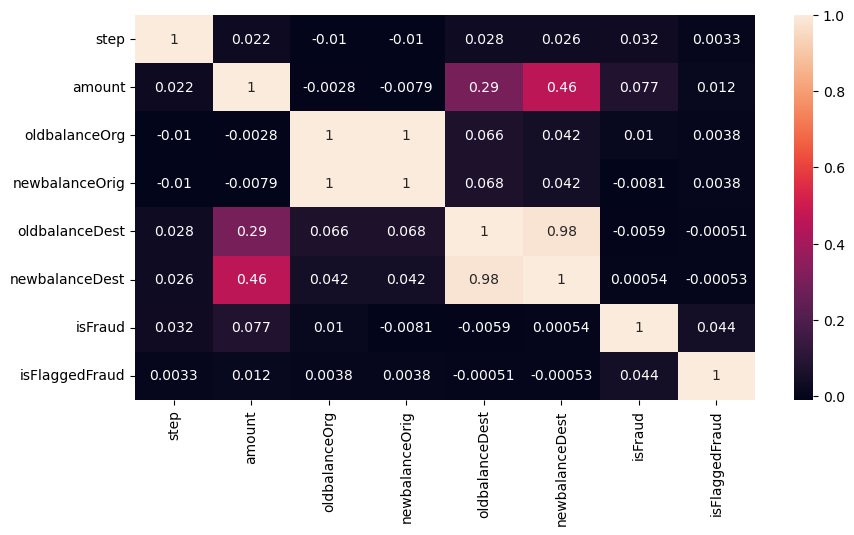

In [16]:
#check for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

* *So multicollinearity exists between oldbalanceOrg and newbalanceOrg; oldbalanceDest and newbalanceDest. Let us try to build the model without removing features.*

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 3. Categorical to Numeric </div>

* *There are 3 attributes that are object data type. Thus we need to convert it to numeric values to chec for multicollinearity*

In [17]:
#convering the object data type columns to integer data type
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [20]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


* *We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.*

* *Thus combine these pairs of collinear attributes and drop the individual ones.*

In [21]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

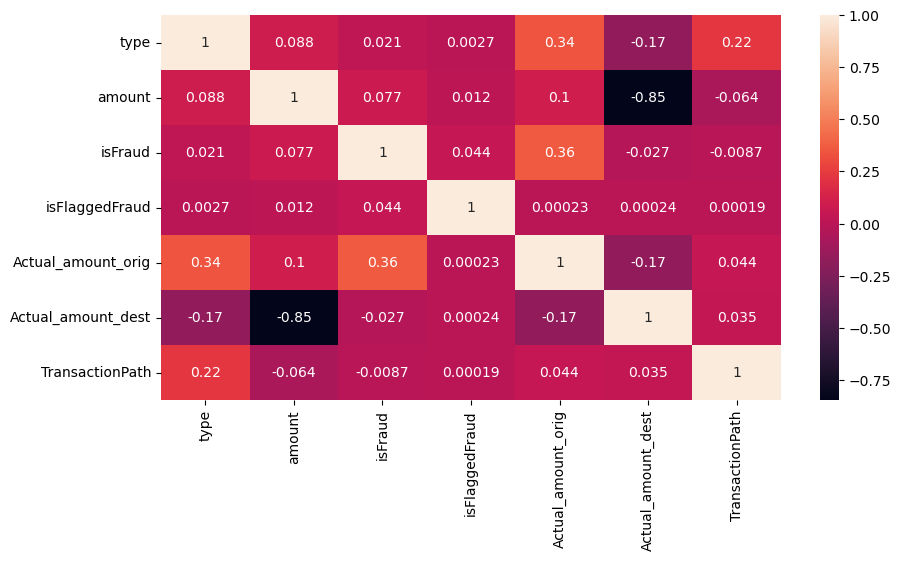

In [22]:
#check for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)


* *Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.*

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 4. Feature Scaling </div>

In [23]:
# Perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 5. Train,test split </div>

In [24]:
# Split the data
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 6. Model training </div>

* *Since the label that is output of the model contains descrete values. So decision tree models are used*


<div class="alert alert-info">Decisison Tree.</div>

In [25]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

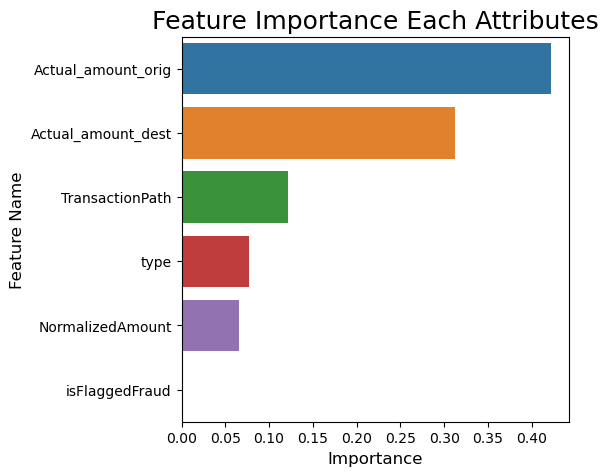

In [26]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": decision_tree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=12)
plt.ylabel ('Feature Name', fontsize=12)
plt.show()

<div class="alert alert-info">Random Forest</div>

In [27]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

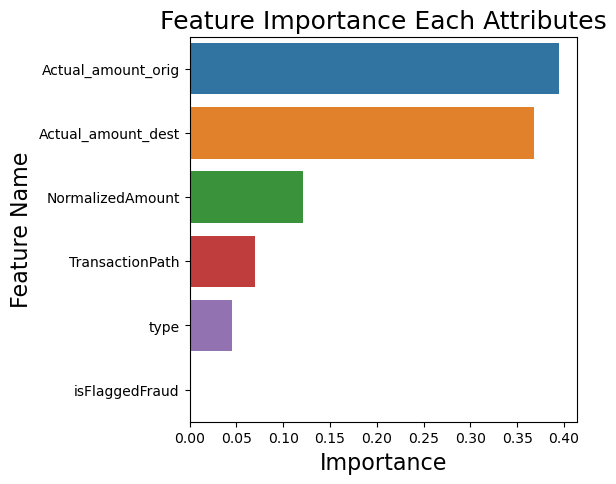

In [28]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": random_forest.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

<div class="alert alert-info">AdaBoostClassifier</div>

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, Y_train)
y_pred = ada.predict(X_test)
ada_score = ada.score(X_test, Y_test) * 100

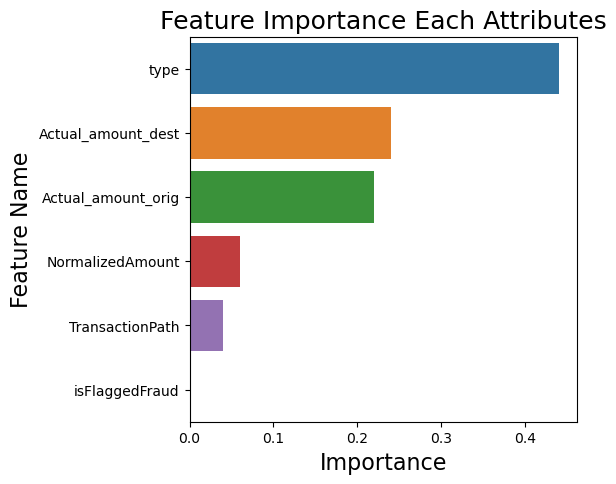

In [30]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [31]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)
print("AdaBoostclassifier Score :", ada_score)

Decision Tree Score:  99.92324964663403
Random Forest Score:  99.95866482675376
AdaBoostclassifier Score : 99.92765034948916


# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 7. Evaluation </div>

In [32]:
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [38]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("============================")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


print("============================")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - AdaBoostClassifier")
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1718
False Positives: 748
True Negatives: 1905603
False Negatives: 717
TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 67
True Negatives: 1906284
False Negatives: 722
TP,FP,TN,FN - AdaBoostClassifier
True Positives: 1218
False Positives: 164
True Negatives: 1906187
False Negatives: 1217


*TP(AdaboostClassifier)<TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
FP(AdaBoostClassifier)<FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
TN(Decision Tree) < TN(AdaBoostClassifier) < TN(Random Forest) - Random Forest is better here too
FN(Decision Tree) ~ FN(Random Forest) < FN(AdaBoostClassifier)*

* *Here Random Forest looks good.*

In [34]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("=================================")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("=================================")

# confusion matrix - ADA

confusion_matrix_rf = confusion_matrix(Y_test, y_pred.round())
print("Confusion Matrix - AdaBoostClassifier")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905603     748]
 [    717    1718]]
Confusion Matrix - Random Forest
[[1906284      67]
 [    722    1713]]
Confusion Matrix - AdaBoostClassifier
[[1906187     164]
 [   1217    1218]]


In [35]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("=====================================================")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Randomforest Classifier")
print(classification_report_rf)

print("=====================================================")

# classification report - ADA

classification_report_ada = classification_report(Y_test, y_pred)
print("Classification Report - AdaBoostClassifier")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report - Randomforest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report - AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786

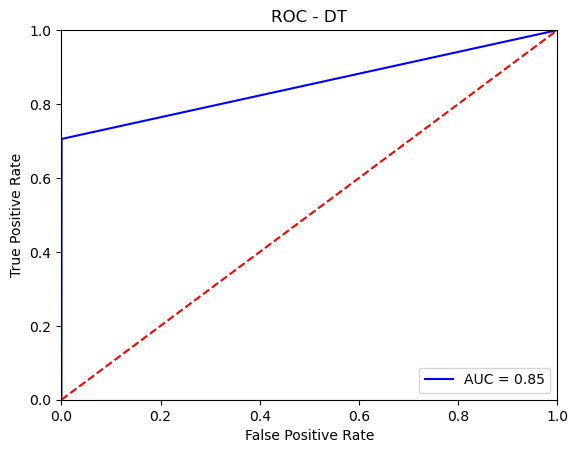

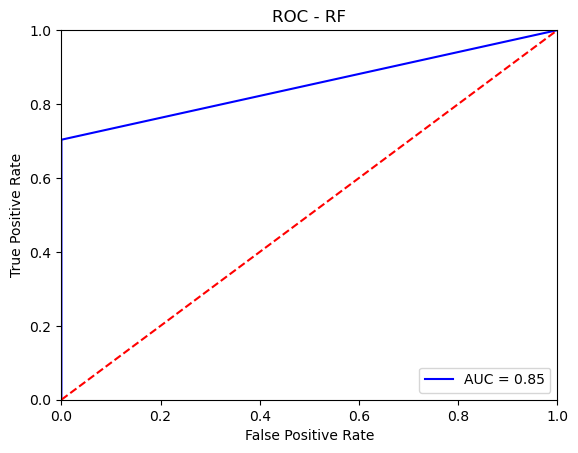

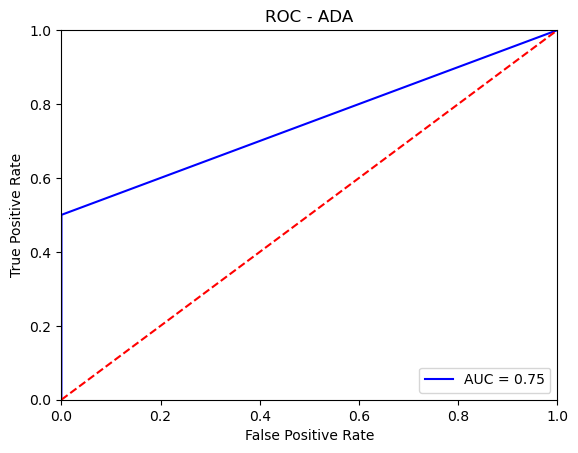

In [36]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - AdaBoostClassifier
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - ADA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* *The AUC for both Decision Tree and Random Forest is equal and for AdaBoostClassifier it is less than the two models, Therefore Decision tree and Random Forest models performs better than AdaBoostClassifier.*

# <div style="text-align:center;background-color: green; font-family:timeroman; color: white; padding: 10px; line-height: 0.8; border-radius:30px"> 8. Conclusion </div>

* *We have seen that Accuracy of Random Forest, Decision Tree and AdaBoostClassifier is pretty close, although the precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.*


* *Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree and AdaBoostClassifier makes decisions in a boolean way.*